In [ ]:
import numpy as np
import pandas as pd
#from tqdm.notebook import tqdm
import torch
from NID_fast import *
import pickle
#import seaborn as sns
#import matplotlib.pyplot as plt

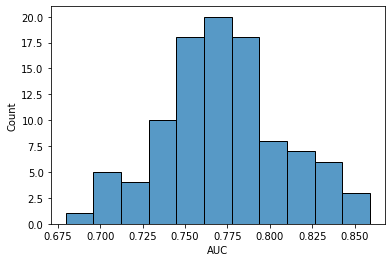

In [2]:
#test_auc = pd.read_csv("/home/kasper/nas/model_runs/mlp_hos6_clumped/test_auc.tsv", sep = "\t")
#sns.histplot(data=test_auc, x="AUC")
#plt.show()

In [3]:
#test_auc.sort_values(by='AUC', ascending=False).head()

,Model_Run,AUC
55,56,0.859108
23,24,0.846711
35,36,0.845743
83,84,0.841445
40,41,0.841213


In [17]:
for i in range(1, 101):
    model_path = "/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_" + str(i) + ".pth"
    model = torch.load(model_path)
    model_weights = get_weights(model)
    
    ### Pairwise interactions
    w_input, w_later = preprocess_weights(model_weights)
    pairwise = get_nlargest(generator = interpret_pairwise_interactions(w_input, w_later), N = 100)
    pairwise_pd = pd.DataFrame(pairwise, columns=["Index", "Importance"])
    
    pair_path = "/home/kasper/nas/model_runs/mlp_hos6_clumped/nid_ouput/pairwise/model_" + str(i) + ".csv"
    pairwise_pd.to_csv(pair_path)
    
    ### Higher order interactions
    higher = get_interactions(model_weights)
    higher_pd = pd.DataFrame(higher, columns=["Index", "Importance"])
    
    higher_path = "/home/kasper/nas/model_runs/mlp_hos6_clumped/nid_ouput/higher/model_" + str(i) + ".csv"
    higher_pd.to_csv(higher_path)

/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_1.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_2.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_3.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_4.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_5.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_6.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_7.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_8.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_9.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_10.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_11.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_12.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_13.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_14.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/model/model_15.pth
/home/kasper/nas/model_runs/mlp_hos6_clumped/mode

In [12]:
#model_weights = get_weights(model)
#w_input, w_later = preprocess_weights(model_weights)
#pairwise = get_nlargest(generator = interpret_pairwise_interactions(w_input, w_later), N = 100)
#pairwise_pd = pd.DataFrame(pairwise, columns=["Index", "Importance"])
#pairwise_pd.to_csv("/home/kasper/Phenotype_prediction/results/mlp_500_250.csv")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1727/1727 [00:40<00:00, 42.54it/s]


In [13]:
#model_weights = get_weights(model)
#higher = get_interactions(model_weights)
#higher_pd = pd.DataFrame(higher, columns=["Index", "Importance"])
#higher_pd.to_csv("/home/kasper/Phenotype_prediction/results/mlp_500_250_higher.csv")